In [5]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('datasets/x_train_all.csv')  

summary_stats = x_train.describe()
summary_stats

0            1            2            3            4  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     89.658514    89.545201    89.343756    89.566770    89.812590   
std      77.521341    77.430539    77.350452    77.498754    77.437292   
min       5.000000     5.000000     4.000000     5.000000     5.000000   
25%      32.000000    32.000000    32.000000    31.000000    32.000000   
50%      57.000000    58.000000    57.000000    58.000000    58.000000   
75%     126.000000   124.000000   122.750000   123.000000   125.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

                 5            6            7            8            9  ...  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000  ...   
mean     89.853251    89.883282    89.978431    90.170175    90.519092  ...   
std      77.279125    77.085714    77.081732    77.062371    77.155644  ...   
min       5.000000     5.000000     4.000000     4.000000     4.000000  ...   
25%      32.000000    32.000000    33.000000    33.000000    33.000000  ...   
50%      58.000000    58.000000    58.000000    59.000000    59.000000  ...   
75%     123.750000   124.000000   124.000000   124.000000   126.000000  ...   
max     255.000000   255.000000   255.000000   255.000000   255.000000  ...   

              2294         2295         2296         2297         2298  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     72.234881    71.833437    71.394118    70.572136    69.660165   
std      65.369022    65.439225    65.402298    65.144238    64.885963   
min       4.000000     4.000000     4.000000     5.000000     4.000000   
25%      26.000000    26.000000    26.000000    26.000000    26.000000   
50%      46.000000    46.000000    46.000000    45.000000    45.000000   
75%      95.000000    93.000000    91.000000    88.000000    86.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

              2299        2300         2301         2302         2303  
count  9690.000000  9690.00000  9690.000000  9690.000000  9690.000000  
mean     68.878638    68.29453    67.831889    67.548297    67.393189  
std      64.530366    64.27455    63.799350    63.437102    63.506304  
min       4.000000     4.00000     5.000000     4.000000     4.000000  
25%      25.000000    25.00000    25.000000    25.000000    25.000000  
50%      44.000000    44.00000    43.000000    43.000000    43.000000  
75%      84.000000    82.00000    82.000000    81.000000    81.000000  
max     255.000000   255.00000   255.000000   255.000000   255.000000  

[8 rows x 2304 columns]

## Initial scores:

#### 10 clusters - 0.14337657005172605
#### 8 clusters - 0.15572181678470226
#### 6 clusters - 0.20639571486279004
#### 4 clusters - 0.3119771748068869
#### 2 clusters - 0.3568434794605163

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def kmeansfunc(data, k):
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print("Inertia: ", kmeans.inertia_)
    return clusters

def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

def db_score(data, clustersdata):
    davies_bouldin = davies_bouldin_score(data, clustersdata)
    print("Davies-Bouldin Score:", davies_bouldin)
    return davies_bouldin

def calinski_score(data, clustersdata):
    calinski_harabasz = calinski_harabasz_score(data, clustersdata)
    print("Calinski-Harabasz Score:", calinski_harabasz)
    return calinski_harabasz



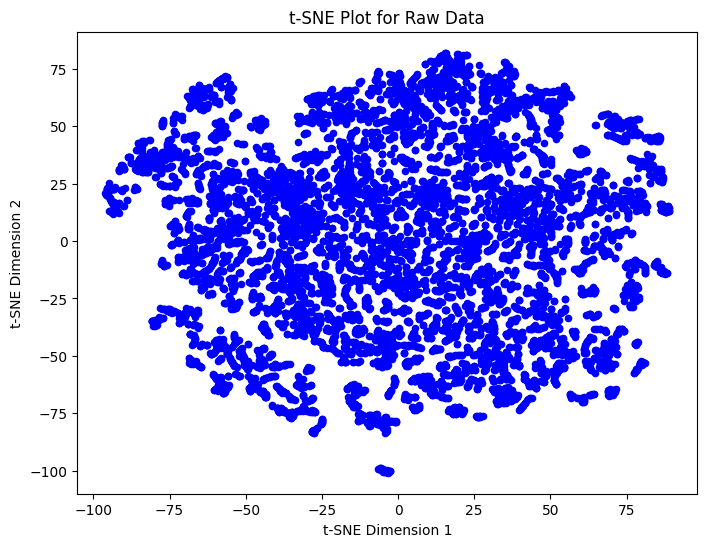

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [8]:
clusters_raw2 = kmeansfunc(raw_data, 2)
clusters_raw2 = clusters_raw2.to_numpy().ravel()
db_score(raw_data, clusters_raw2)
calinski_score(raw_data, clusters_raw2)
silhouetteScore(raw_data,clusters_raw2)

Inertia:  65497786443.08869
Davies-Bouldin Score: 1.3051138364604997
Calinski-Harabasz Score: 5148.986891793889
Silhouette Score: 0.3568434794605163


0.3568434794605163

In [9]:
clusters_raw4 = kmeansfunc(raw_data, 4)
clusters_raw4 = clusters_raw4.to_numpy().ravel()
db_score(raw_data, clusters_raw4)
calinski_score(raw_data, clusters_raw4)
silhouetteScore(raw_data,clusters_raw4)

Inertia:  49316603101.27843
Davies-Bouldin Score: 1.6124740005176188
Calinski-Harabasz Score: 3338.352150406512
Silhouette Score: 0.31229964108035246


0.31229964108035246

In [10]:
clusters_raw6 = kmeansfunc(raw_data, 6)
clusters_raw6 = clusters_raw6.to_numpy().ravel()
db_score(raw_data, clusters_raw6)
calinski_score(raw_data, clusters_raw6)
silhouetteScore(raw_data,clusters_raw6)

Inertia:  42727545892.625946
Davies-Bouldin Score: 1.7417000596220011
Calinski-Harabasz Score: 2610.096126001806
Silhouette Score: 0.2062832009478464


0.2062832009478464

In [11]:
clusters_raw8 = kmeansfunc(raw_data, 8)
clusters_raw8 = clusters_raw8.to_numpy().ravel()
db_score(raw_data, clusters_raw8)
calinski_score(raw_data, clusters_raw8)
silhouetteScore(raw_data,clusters_raw8)

Inertia:  39315479630.90561
Davies-Bouldin Score: 1.827971173140072
Calinski-Harabasz Score: 2145.775945920789
Silhouette Score: 0.15622733826098695


0.15622733826098695

In [12]:
clusters_raw10 = kmeansfunc(raw_data, 10)
clusters_raw10 = clusters_raw10.to_numpy().ravel()
db_score(raw_data, clusters_raw10)
calinski_score(raw_data, clusters_raw10)
silhouetteScore(raw_data,clusters_raw10)

Inertia:  37377826503.977875
Davies-Bouldin Score: 1.8406023107835512
Calinski-Harabasz Score: 1810.847726961255
Silhouette Score: 0.14415097388146353


0.14415097388146353

In [13]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    graph_clusters = kmeans.fit_predict(x_train)
    graph_clusters = graph_clusters.ravel()
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(x_train, graph_clusters)
    silhouette_scores.append(score)

Silhouette Score: 0.3568434794605163
Silhouette Score: 0.3170884889237454
Silhouette Score: 0.31229964108035246
Silhouette Score: 0.21430095379760047
Silhouette Score: 0.2062832009478464
Silhouette Score: 0.20870984360642167
Silhouette Score: 0.15622733826098695
Silhouette Score: 0.15338825857147426
Silhouette Score: 0.14415097388146353
Silhouette Score: 0.13447243481350038
Silhouette Score: 0.13482335921102703
Silhouette Score: 0.13874244518578438
Silhouette Score: 0.13469241031480444
Silhouette Score: 0.13606313296756697


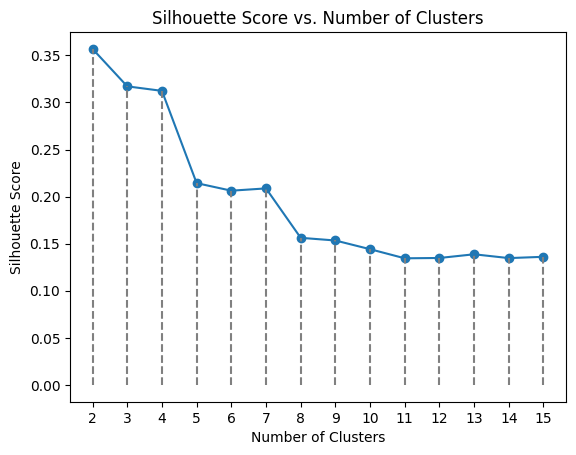

In [14]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

p_df = pd.read_csv('processed_df2.csv')
p_df.shape

(9690, 2304)

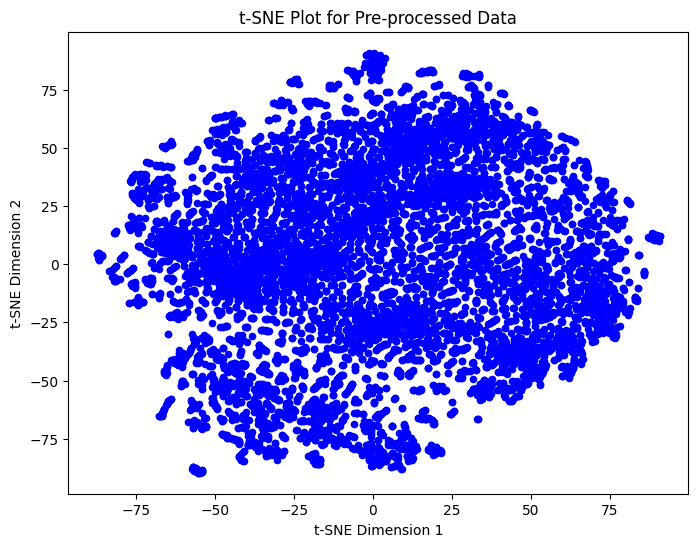

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

preprocessed_data = p_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

preprocessed_embedded = tsne.fit_transform(preprocessed_data)

plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_embedded[:, 0], preprocessed_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [17]:
def grayscale_to_infrared(grayscale_image):
    row = np.array(grayscale_image, dtype=np.uint8)
    color_map = plt.get_cmap('hot')
    normalized_image = row / 255.0
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)
    return infrared_image.flatten()

In [18]:
infrared_original = []

for i, idx in enumerate(x_train.index):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_org = pd.DataFrame(infrared_original)
infrared_df_org.shape

(9690, 2304)

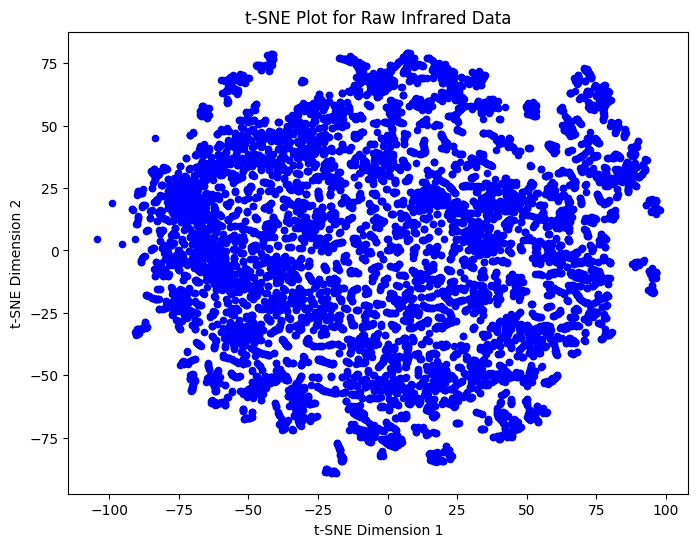

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


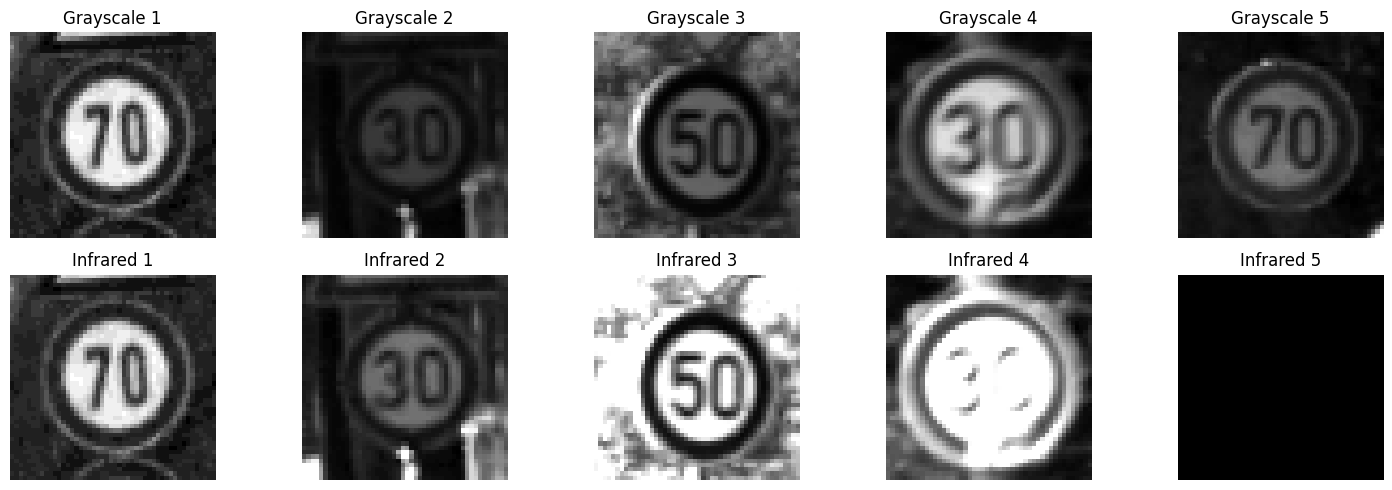

In [20]:
sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
clusters = kmeansfunc(infrared_df_org, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_org, clusters)
calinski_score(infrared_df_org, clusters)
silhouetteScore(infrared_df_org,clusters)

Inertia:  42586019439.537834
Davies-Bouldin Score: 2.037192163517471
Calinski-Harabasz Score: 2074.279406261873
Silhouette Score: 0.1330265462762411


0.1330265462762411

In [22]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)
infra_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [23]:
clusters = kmeansfunc(infra_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_no_outliers,clusters)

Inertia:  36544061268.2981
Davies-Bouldin Score: 1.9315689450029914
Calinski-Harabasz Score: 1735.1900145378881
Silhouette Score: 0.13274054027082288


0.13274054027082288

In [24]:
mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [25]:
clusters = kmeansfunc(infra_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_norm, clusters)
calinski_score(infra_norm, clusters)
silhouetteScore(infra_norm,clusters)

Inertia:  8628573.167205906
Davies-Bouldin Score: 2.031115994729892
Calinski-Harabasz Score: 1662.3886215795287
Silhouette Score: 0.13767499440281017


0.13767499440281017

In [26]:
mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [27]:
infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [28]:
clusters = kmeansfunc(infrared_df_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_norm, clusters)
calinski_score(infrared_df_norm, clusters)
silhouetteScore(infrared_df_norm, clusters)

Inertia:  28858058916.780716
Davies-Bouldin Score: 2.5270108675773386
Calinski-Harabasz Score: 1583.1951564842373
Silhouette Score: 0.49533744639895144


0.49533744639895144

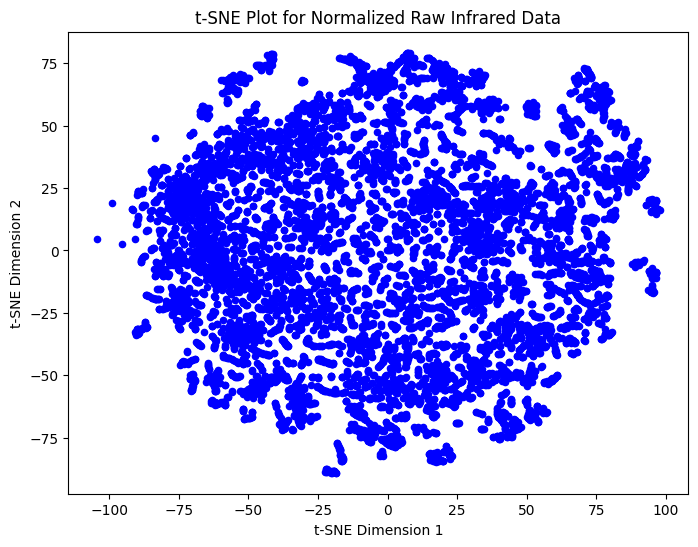

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [30]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [31]:
clusters = kmeansfunc(infra_norm_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_norm_no_outliers, clusters)

Inertia:  27532452729.77773
Davies-Bouldin Score: 9.675814366281596
Calinski-Harabasz Score: 83.00404605524865
Silhouette Score: 0.5121251681794311


0.5121251681794311

In [32]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(infra_norm_no_outliers) 
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

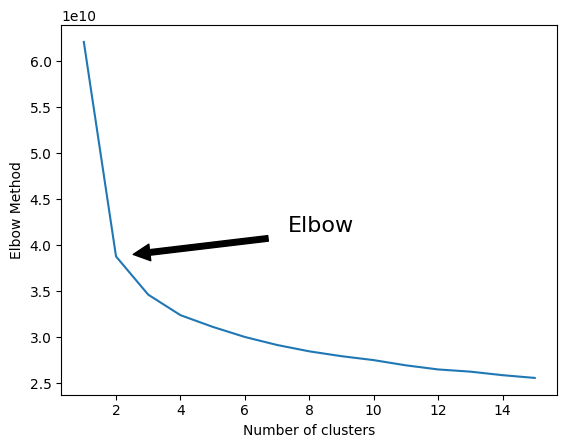

In [33]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(2, wcss[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Elbow Method') 
plt.show()

In [34]:
clusters = kmeansfunc(infra_norm_no_outliers, 2)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_norm_no_outliers,clusters)

Inertia:  38799438787.72011
Davies-Bouldin Score: 2.558316311989749
Calinski-Harabasz Score: 432.17496957663957
Silhouette Score: 0.6782254634854106


0.6782254634854106

In [35]:
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

In [36]:
infrared_prep = []

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [37]:
infra_norm_no_outliers.shape

(9593, 2304)

In [38]:
def kmeansfunc_iter(data, k, seed):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [39]:
seed_value = 0
max_score = 0
best_seed = 0

while seed_value<101:
    clusters = kmeansfunc_iter(prepped_infrared_df, 10, seed_value)
    cur_score = silhouetteScore_iter(prepped_infrared_df, clusters)
    if cur_score > max_score:
        best_seed = seed_value
        max_score = cur_score
    seed_value = seed_value + 1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  1
9589  1
9590  1
9591  1
9592  1

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     6
1     6
2     6
3     6
4     6
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     9
1     9
2     9
3     9
4     9
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     9
1     9
2     9
3     9
4     9
...  ..
9588  1
9589  1
9590  1
9591  1
9592  1

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     9
1     9
2     9
3     9
4     9
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     9
1     9
2     9
3     9
4     9
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     6
1     6
2     6
3     6
4     6
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print(best_seed)
max_score

31


0.5038949720499546

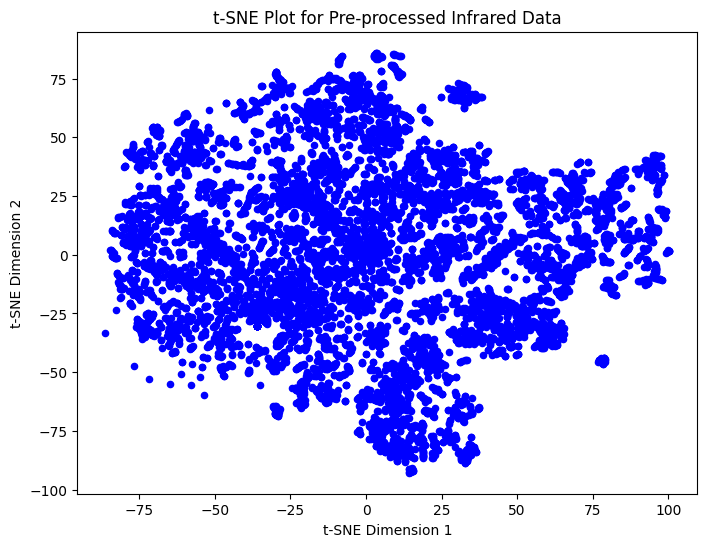

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [42]:
clusters = kmeansfunc(prepped_infrared_df, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  16673544293.648014
Davies-Bouldin Score: 2.051948987606145
Calinski-Harabasz Score: 2057.522652058677
Silhouette Score: 0.49612473432406956


0.49612473432406956

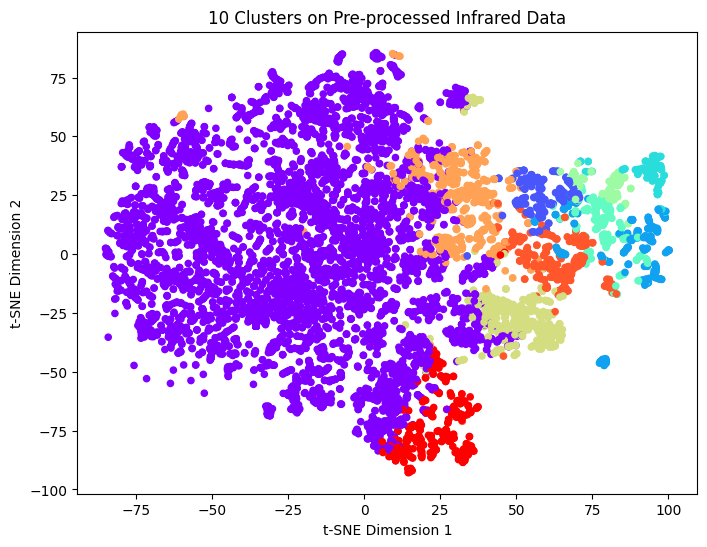

In [43]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [44]:
clusters = kmeansfunc(prepped_infrared_df, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  26778047697.812164
Davies-Bouldin Score: 0.9552133638986922
Calinski-Harabasz Score: 7920.712473636974
Silhouette Score: 0.7033537860848569


0.7033537860848569

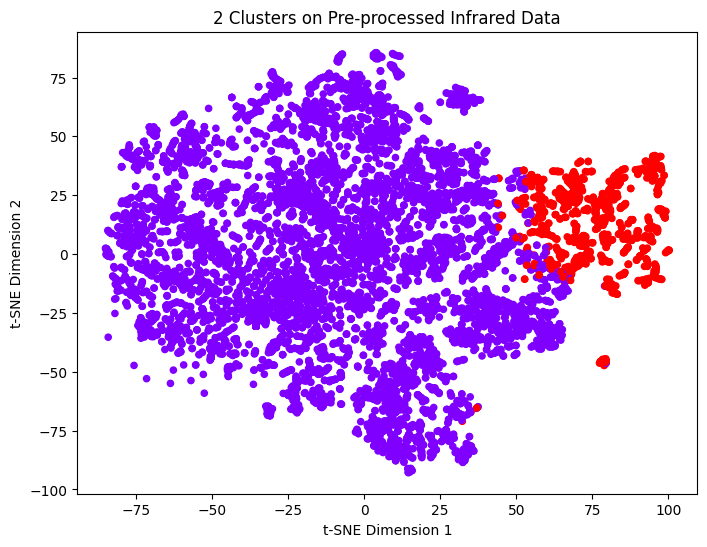

In [45]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [47]:
df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 10)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  11823776349.651245
Davies-Bouldin Score: 1.7306927100412044
Calinski-Harabasz Score: 2900.966196145908
Silhouette Score: 0.5395022526831526


0.5395022526831526

In [48]:
df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 2)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  21923775076.207466
Davies-Bouldin Score: 0.8640690425775245
Calinski-Harabasz Score: 9674.220494187652
Silhouette Score: 0.7293835220969097


0.7293835220969097

In [49]:
image_df = prepped_infrared_df.copy()

In [50]:
import cv2
import pandas as pd
import numpy as np

# Assuming 'image_df' is your DataFrame with each row as an image

# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

# Create a new DataFrame from the Fourier Transformed images
fourier_df = pd.DataFrame(fourier_transformed_images)

# The 'fourier_df' DataFrame now contains the magnitude spectra of the images


In [51]:
fourier_df.shape

(9593, 2304)

In [52]:
image_df = fourier_df.copy()

In [53]:
import numpy as np
import cv2  # Make sure you have OpenCV installed

# Define a function to emphasize lower frequencies using DCT
def emphasize_lower_frequencies(image, keep_ratio=0.1):
    # Apply DCT
    dct = cv2.dct(np.float32(image))

    # Determine the threshold to retain keep_ratio of the coefficients
    sorted_dct = np.sort(np.abs(dct), axis=None)
    threshold = sorted_dct[int(keep_ratio * sorted_dct.size)]

    # Zero out high-frequency coefficients
    dct[np.abs(dct) < threshold] = 0

    # Apply inverse DCT to get the filtered image
    filtered_image = cv2.idct(dct)
    
    return filtered_image


In [54]:
image_df = prepped_infrared_df.copy()

filtered_images = []

for index, row in image_df.iterrows():
    image_data = row.values
    filtered_image = emphasize_lower_frequencies(image_data, keep_ratio=0.1)
    filtered_images.append(equalized_image.flatten())

filtered_df = pd.DataFrame(filtered_images)
filtered_df.shape

(9593, 2304)

In [55]:
image_df = prepped_infrared_df.copy()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [57]:
clusters = kmeansfunc(scaled_data_normalized, 10)
clusters = clusters.to_numpy().ravel()
db_score(scaled_data_normalized, clusters)
calinski_score(scaled_data_normalized, clusters)
silhouetteScore(scaled_data_normalized, clusters)

Inertia:  327999.76436712436
Davies-Bouldin Score: 2.0389096627679466
Calinski-Harabasz Score: 1863.6727789478512
Silhouette Score: 0.3707546834068492


0.3707546834068492

In [58]:
prepped_infrared_df.shape

(9593, 2304)

In [59]:
import cv2

def apply_median_filter(image, kernel_size=37):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [60]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

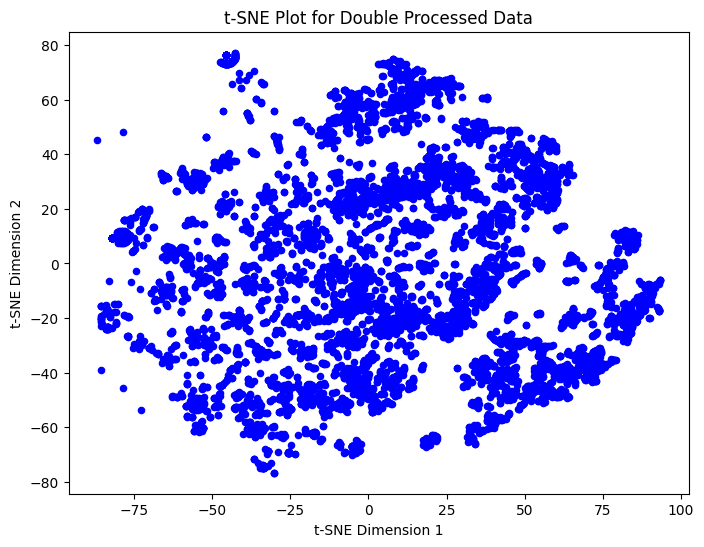

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df2.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [62]:
clusters = kmeansfunc(prepped_infrared_df2, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  3787875620.852805
Davies-Bouldin Score: 1.3571805065227136
Calinski-Harabasz Score: 6898.280474364123
Silhouette Score: 0.7628645577841611


0.7628645577841611

In [63]:
clusters = kmeansfunc(prepped_infrared_df2, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  11172100781.2452
Davies-Bouldin Score: 0.6848884133348282
Calinski-Harabasz Score: 14727.997624261909
Silhouette Score: 0.8695890578167562


0.8695890578167562

In [64]:
pca_50 = PCAOnData(prepped_infrared_df2, 50)

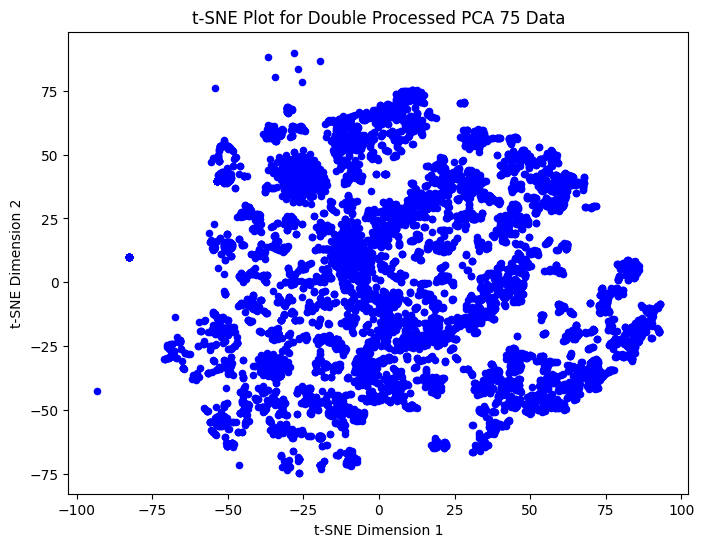

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(pca_50)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed PCA 75 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [66]:
clusters = kmeansfunc(pca_50, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  3567678603.8118095
Davies-Bouldin Score: 1.3347422735917953
Calinski-Harabasz Score: 7323.966846959563
Silhouette Score: 0.7759465445118936


0.7759465445118936

In [67]:
clusters = kmeansfunc(pca_50, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  10951686137.95024
Davies-Bouldin Score: 0.6776401279477638
Calinski-Harabasz Score: 15024.38431390745
Silhouette Score: 0.8711202617699685


0.8711202617699685

In [68]:
clusters = kmeansfunc(pca_50, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  5029300242.627951
Davies-Bouldin Score: 1.188205769888524
Calinski-Harabasz Score: 10999.279172975526
Silhouette Score: 0.7906862219795578


0.7906862219795578

In [69]:
pca_3 = PCAOnData(prepped_infrared_df2,3)

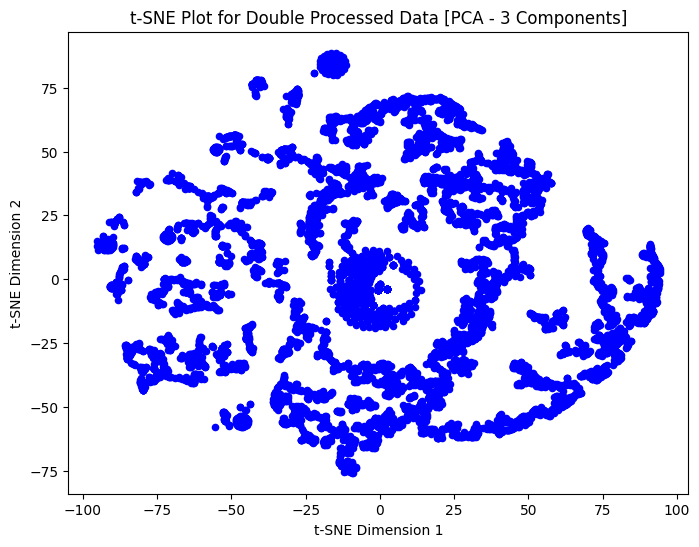

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [71]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(pca_3) 
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

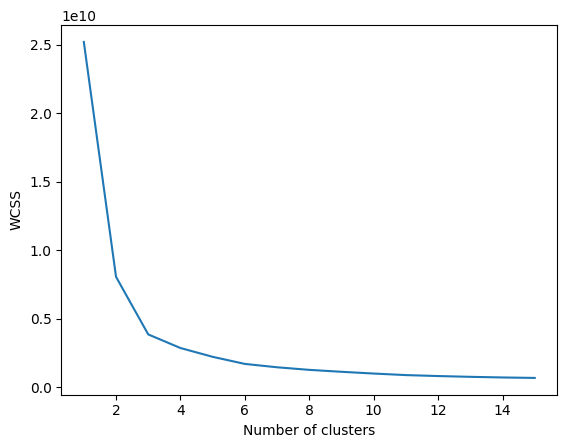

In [72]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(4, inertia[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('WCSS') 
plt.show()

In [73]:
clusters = kmeansfunc(pca_3, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  1002978669.113007
Davies-Bouldin Score: 0.7459418840241796
Calinski-Harabasz Score: 25701.490166442934
Silhouette Score: 0.805857711981216


0.805857711981216

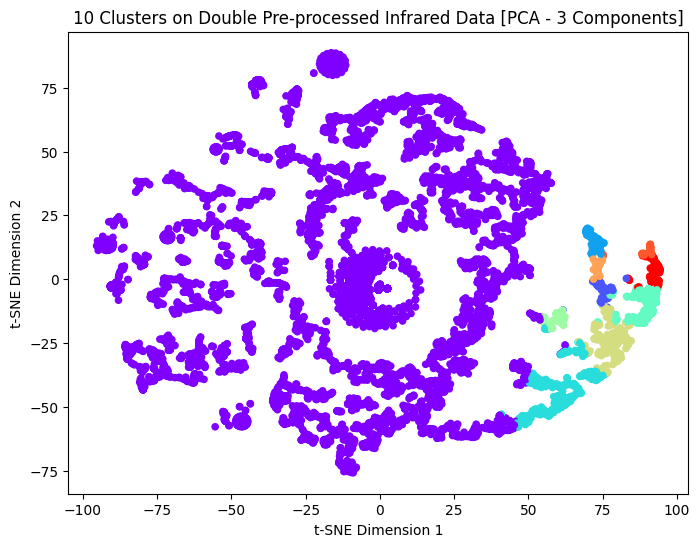

In [74]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [75]:
clusters = kmeansfunc(pca_3, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  8064329532.1238365
Davies-Bouldin Score: 0.5666139538183642
Calinski-Harabasz Score: 20394.836191896407
Silhouette Score: 0.8916198226720151


0.8916198226720151

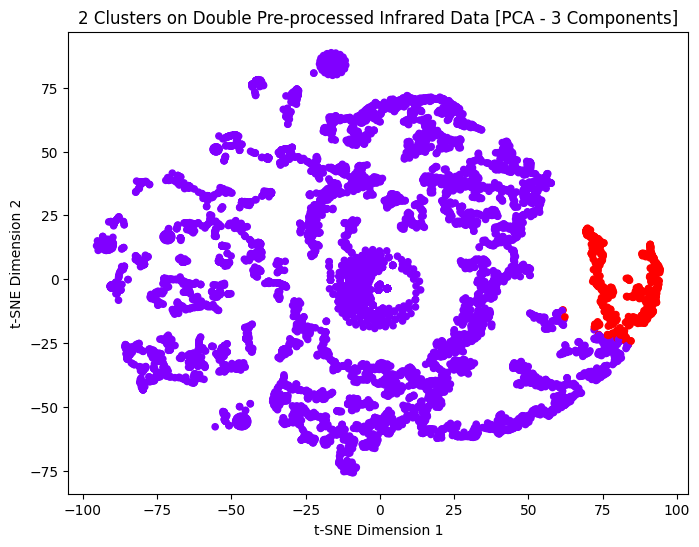

In [76]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [77]:
clusters = kmeansfunc(pca_3, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  2224012630.182545
Davies-Bouldin Score: 0.7513389025935194
Calinski-Harabasz Score: 24776.880114734104
Silhouette Score: 0.8309431360993224


0.8309431360993224

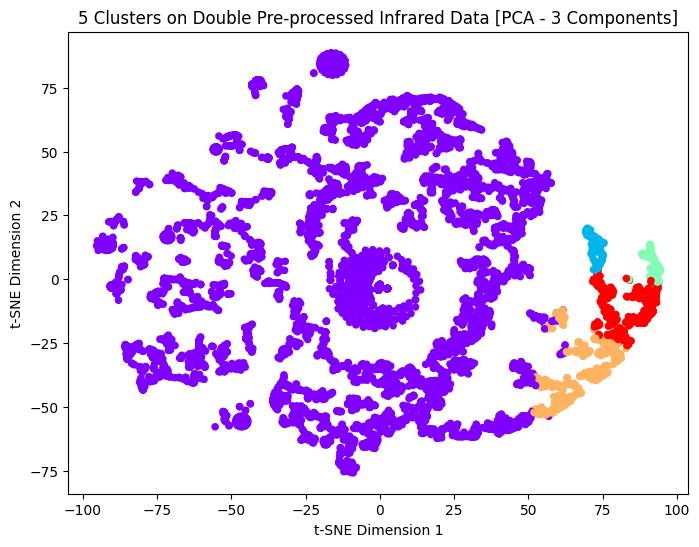

In [78]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [79]:
import umap.umap_ as umap

data_df = prepped_infrared_df2.copy()
umap_model = umap.UMAP(n_components=2)
reduced_data = umap_model.fit_transform(data_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [80]:
clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  50626.203125
Davies-Bouldin Score: 0.6020279697217295
Calinski-Harabasz Score: 16651.881854274587
Silhouette Score: 0.55657417


0.55657417

In [81]:
from sklearn.random_projection import GaussianRandomProjection

data_df = prepped_infrared_df2.copy()
rp = GaussianRandomProjection(n_components=1000)
reduced_data = rp.fit_transform(data_df)

In [82]:
clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  3813318178.3714323
Davies-Bouldin Score: 1.5246693329793337
Calinski-Harabasz Score: 7005.234202662279
Silhouette Score: 0.7651827547357318


0.7651827547357318

In [83]:
from sklearn.manifold import Isomap
data_df = prepped_infrared_df2.copy()
isomap = Isomap(n_components=50)
reduced_data = isomap.fit_transform(data_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [84]:
iso_df = prepped_infrared_df2.copy()

In [85]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [86]:
clusters_10 = kmeansfunc(iso_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(iso_data, clusters_10)
calinski_score(iso_data, clusters_10)
silhouetteScore(iso_data, clusters_10)

Inertia:  5956343236.276327
Davies-Bouldin Score: 0.7170725644093434
Calinski-Harabasz Score: 22721.444827551615
Silhouette Score: 0.8500999167605613


0.8500999167605613

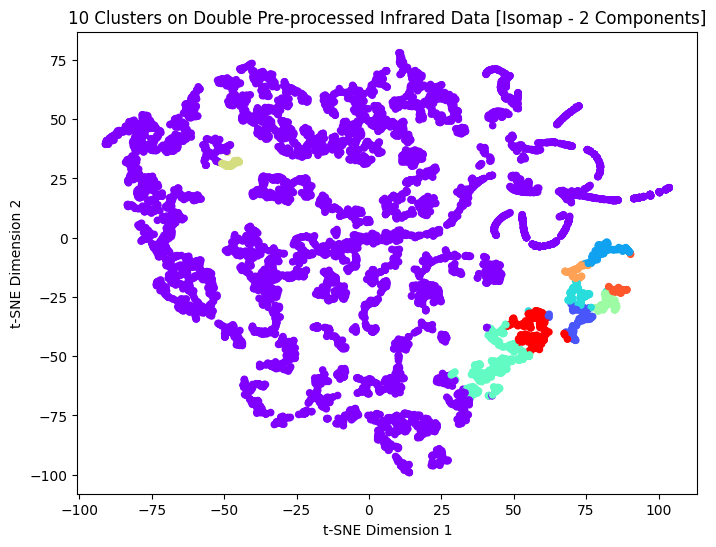

In [87]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [88]:
clusters_2 = kmeansfunc(iso_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(iso_data, clusters_2)
calinski_score(iso_data, clusters_2)
silhouetteScore(iso_data, clusters_2)

Inertia:  44583064876.33247
Davies-Bouldin Score: 0.554916499074485
Calinski-Harabasz Score: 19033.650089295013
Silhouette Score: 0.9109522225790744


0.9109522225790744

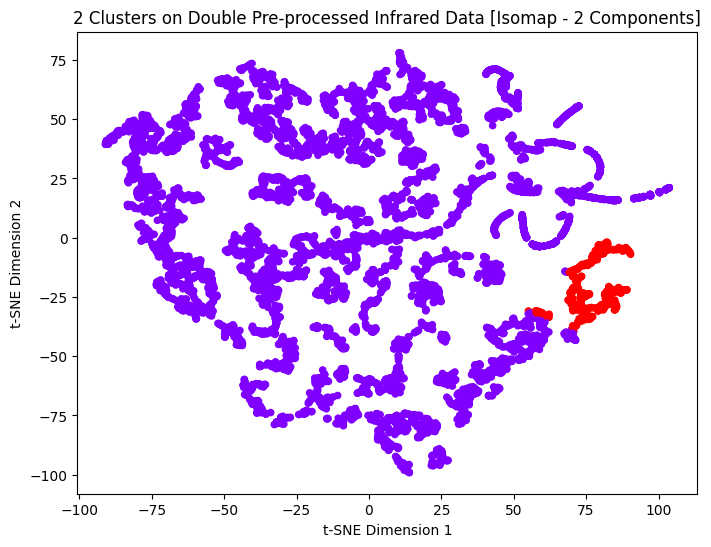

In [89]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [90]:
clusters_5 = kmeansfunc(iso_data, 5)
clusters_5 = clusters_5.to_numpy().ravel()
db_score(iso_data, clusters_5)
calinski_score(iso_data, clusters_5)
silhouetteScore(iso_data, clusters_5)

Inertia:  12387205924.474693
Davies-Bouldin Score: 0.6141953969010442
Calinski-Harabasz Score: 23350.84541746508
Silhouette Score: 0.8793615267569137


0.8793615267569137

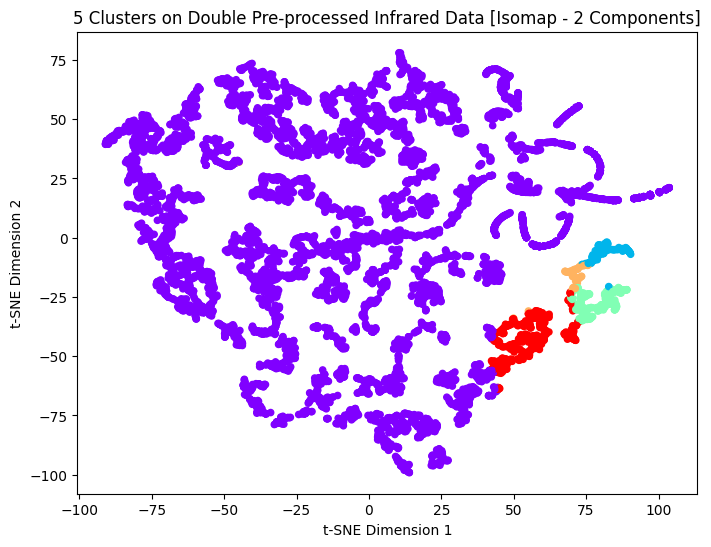

In [91]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_5, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Highest scores thus far:

#### 10 clusters - 0.9750181505494335 (Initial score - 0.14337657005172605)
#### 8 clusters - 0.9743239952747715 (Initial score - 0.15572181678470226)
#### 6 clusters - 0.9731338122205031 (Initial score - 0.20639571486279004)
#### 4 clusters - 0.9903732291634489 (Initial score - 0.3119771748068869)
#### 2 clusters - 0.845465747890616 (Initial score - 0.3568434794605163)

In [92]:
def lp_intensify(arr, lower_percentile, upper_percentile):
    lower_limit = np.percentile(arr, lower_percentile)
    upper_limit = np.percentile(arr, upper_percentile)
    
    arr[arr < lower_limit] = 0
    arr[arr > upper_limit] = 255
    
    return arr

data = iso_data.copy()
lower_frequency_data = lp_intensify(data, 87, 90)

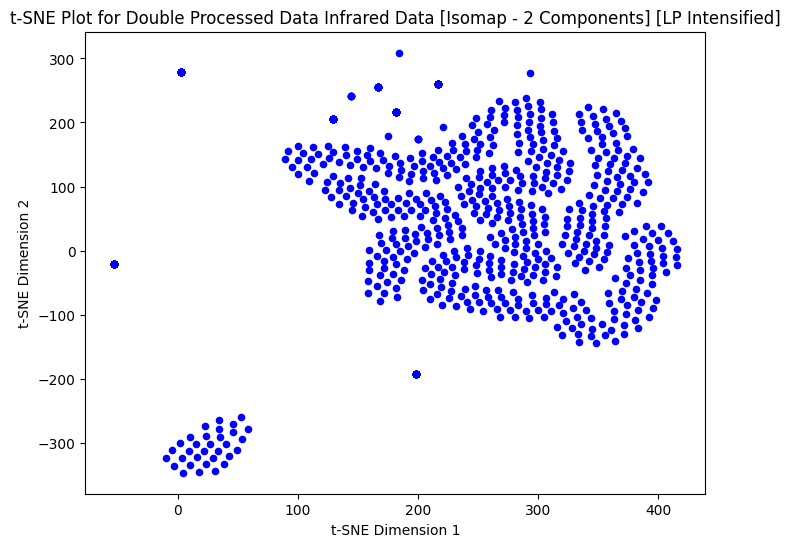

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [94]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19)
    graph_clusters = kmeans.fit_predict(lower_frequency_data)
    graph_clusters = pd.DataFrame(graph_clusters)
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(lower_frequency_data, graph_clusters)
    silhouette_scores.append(score)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.845465747890616


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9559656747743789


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.990373229163449


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.971701710144259


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9730489766645994


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9737088113606591


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9745143465384948


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9742042201062295


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9749902342010459


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.974920193798448


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.973647881790577


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9731913048868763


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9734404170408368


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9734863938164421


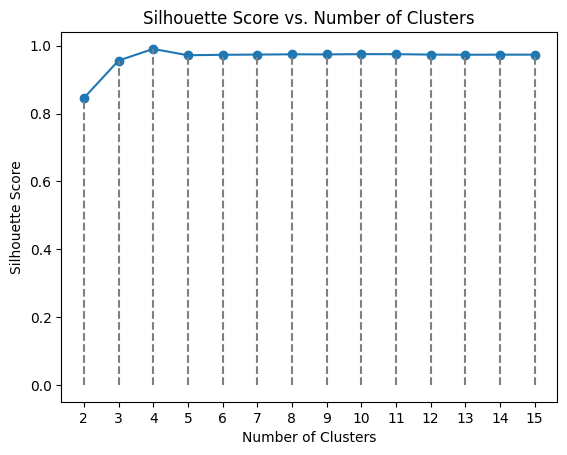

In [95]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

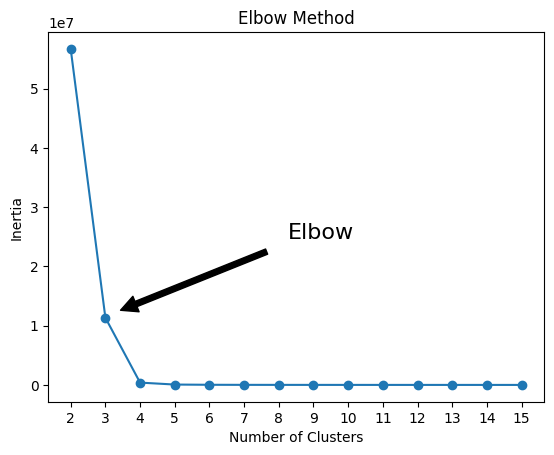

In [96]:
plt.plot(cluster_range, inertia, marker='o')
plt.xticks(cluster_range)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow',
             xy=(2.9, inertia[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Elbow Method')
plt.show()

In [97]:
clusters_2 = kmeansfunc(lower_frequency_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(lower_frequency_data, clusters_2)
calinski_score(lower_frequency_data, clusters_2)
silhouetteScore(lower_frequency_data, clusters_2)

Inertia:  56696803.326636225
Davies-Bouldin Score: 0.405532025018941
Calinski-Harabasz Score: 15514.45147168425
Silhouette Score: 0.845465747890616


0.845465747890616

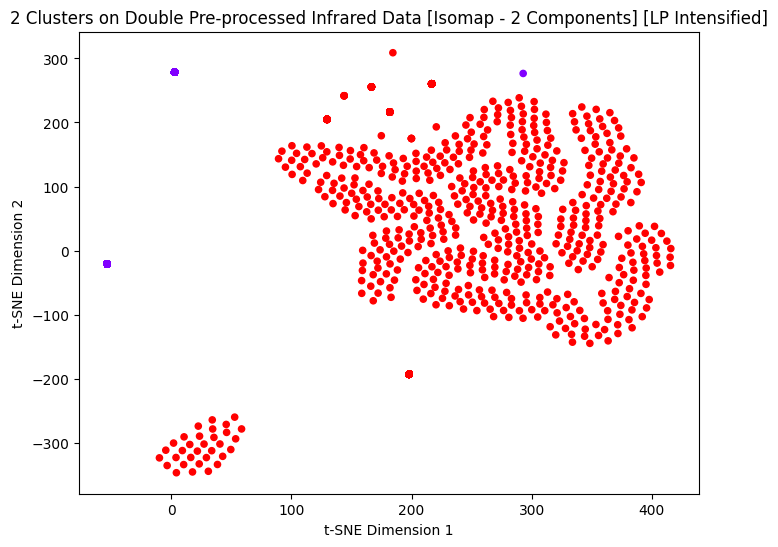

In [98]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [99]:
clusters_4 = kmeansfunc(lower_frequency_data, 4)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)
calinski_score(lower_frequency_data, clusters_4)
silhouetteScore(lower_frequency_data, clusters_4)

Inertia:  392728.4241888795
Davies-Bouldin Score: 0.056269597108029173
Calinski-Harabasz Score: 1204679.9302375999
Silhouette Score: 0.990373229163449


0.990373229163449

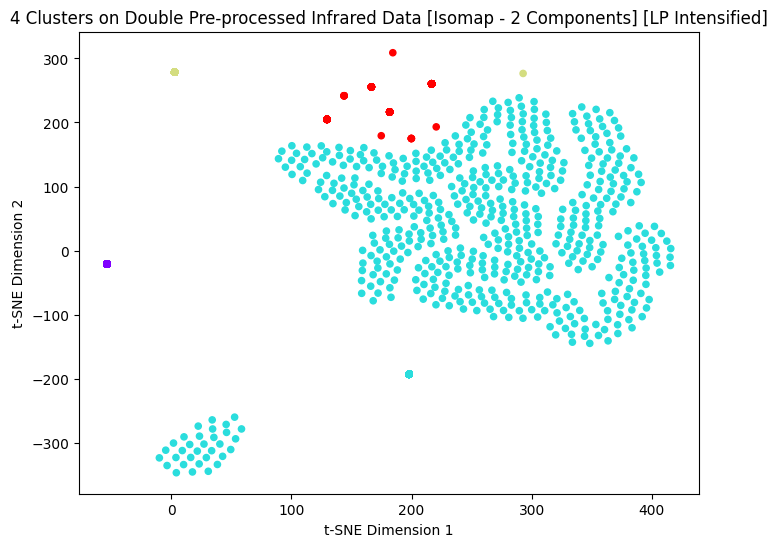

In [100]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_4, cmap='rainbow', s=20)
plt.title('4 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [101]:
clusters_6 = kmeansfunc(lower_frequency_data, 6)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)
calinski_score(lower_frequency_data, clusters_6)
silhouetteScore(lower_frequency_data, clusters_6)

Inertia:  24310.147473686073
Davies-Bouldin Score: 0.23368389903720613
Calinski-Harabasz Score: 11703525.41286458
Silhouette Score: 0.9730489766645994


0.9730489766645994

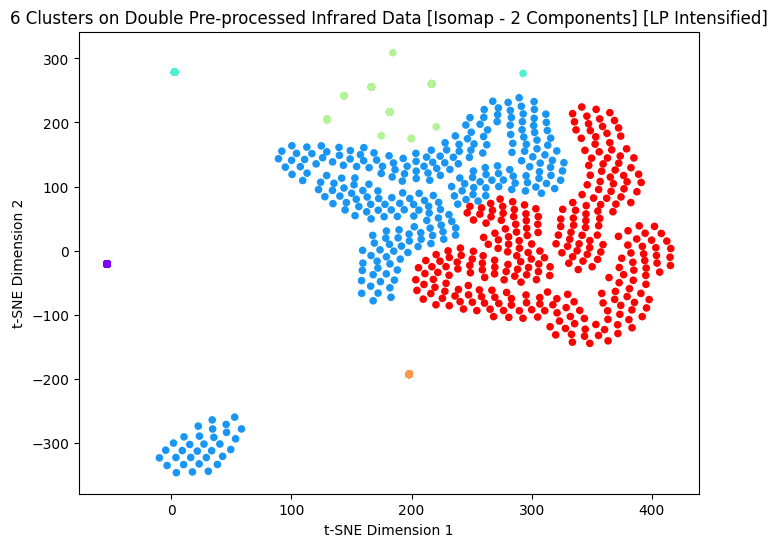

In [102]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_6, cmap='rainbow', s=20)
plt.title('6 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [103]:
clusters_8 = kmeansfunc(lower_frequency_data, 8)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)
calinski_score(lower_frequency_data, clusters_8)
silhouetteScore(lower_frequency_data, clusters_8)

Inertia:  8450.874415206283
Davies-Bouldin Score: 0.2686082568254573
Calinski-Harabasz Score: 24056412.9051498
Silhouette Score: 0.9745143465384948


0.9745143465384948

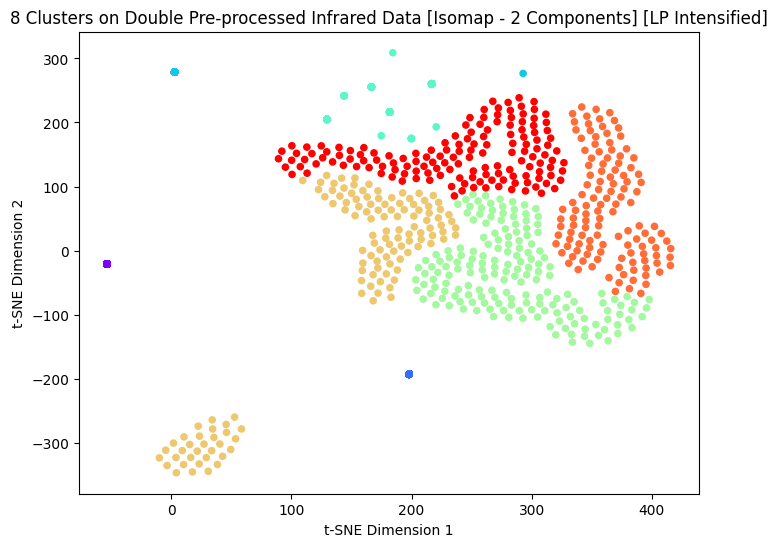

In [104]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_8, cmap='rainbow', s=20)
plt.title('8 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [105]:
clusters_10 = kmeansfunc(lower_frequency_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)
calinski_score(lower_frequency_data, clusters_10)
silhouetteScore(lower_frequency_data, clusters_10)

Inertia:  4430.240993349288
Davies-Bouldin Score: 0.25693214159041255
Calinski-Harabasz Score: 35671187.976600304
Silhouette Score: 0.9749902342010459


0.9749902342010459

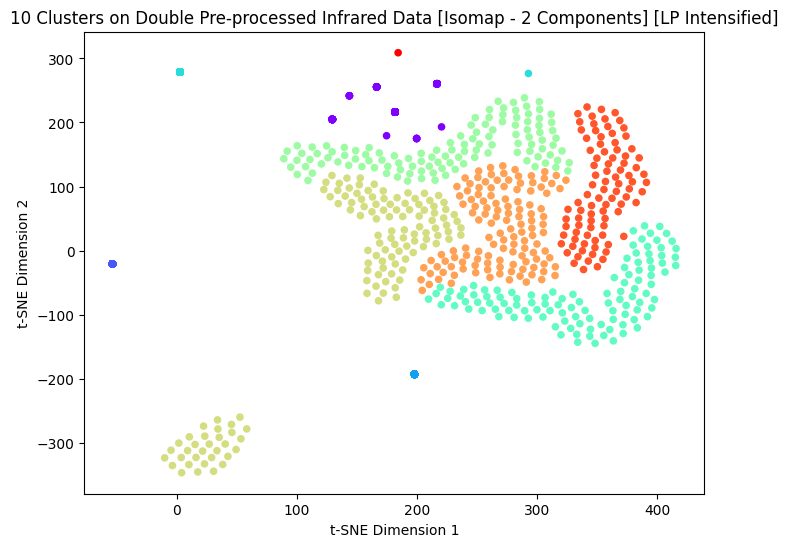

In [106]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [107]:
lower_frequency_data.shape

(9593, 2)

In [108]:
change_to_df = pd.DataFrame(lower_frequency_data)
change_to_df.shape

(9593, 2)

In [109]:
infrared_data.shape

(9593, 2)

In [111]:
y_train = pd.read_csv('datasets/y_train_all.csv')
y_train = y_train.drop(outlier_indices)
y_train = np.asarray(y_train)
y_train.shape

(9593, 1)

In [112]:
p_df_accuracy = p_df.copy()
p_df_accuracy = p_df_accuracy.drop(outlier_indices)

In [113]:
p_df_accuracy.shape

(9593, 2304)

In [114]:
import cv2

def apply_median_filter_accuracy(image, kernel_size=37):
    image = image.astype(np.uint8)
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_blur_cv_accuracy(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_bilateral_filter_accuracy(image, diameter=25, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [115]:
image_df_accuracy = p_df_accuracy.copy()
accuracy = []

for index, row in image_df_accuracy.iterrows():
    image_data = row.values
    median_image = apply_median_filter_accuracy(image_data)
    gaussian_image = apply_gaussian_blur_cv_accuracy(median_image)
    median_image = apply_median_filter_accuracy(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv_accuracy(median_image)
    accuracy.append(gaussian_image.flatten())

image_df_accuracy = pd.DataFrame(accuracy)
image_df_accuracy.shape

(9593, 2304)

In [116]:
# isomap = Isomap(n_components=500)
# test_pdf2 = isomap.fit_transform(p_df_accuracy)
isomap = Isomap(n_components=500)
test_pdf2 = isomap.fit_transform(image_df_accuracy)

In [117]:
kmeans = KMeans(n_clusters=10, random_state=19, n_init=10)
testing_df = iso_data.copy()
# testing_df.drop(outlier_indices, inplace=True)
cluster_labels = kmeans.fit_predict(testing_df)

In [118]:
data = []
labels = []

for cluster_label in np.unique(cluster_labels):
    cluster_mask = (cluster_labels == cluster_label)
    X_cluster = testing_df[cluster_mask]
    y_cluster = y_train[cluster_mask].flatten()
    majority_class = np.bincount(y_cluster).argmax()

    for unique_class in y_cluster:
        class_size = np.sum(y_cluster == unique_class)

    data.append(X_cluster)
    labels.append(y_cluster)

data = np.concatenate(data, axis=0)
labels = np.concatenate(labels)


In [119]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, labels)
accuracy

0.6777858855415407

SOFT CLUSTERING

In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=19)
tsne_result = tsne.fit_transform(test_pdf2) 

Accuracy calculator

In [132]:
def accuracycalc(cluster_labels):
    data = []
    labels = []

    for cluster_label in np.unique(cluster_labels):
        cluster_mask = (cluster_labels == cluster_label)
        X_cluster = testing_df[cluster_mask]
        y_cluster = y_train[cluster_mask].flatten()
        majority_class = np.bincount(y_cluster).argmax()

        for unique_class in y_cluster:
            class_size = np.sum(y_cluster == unique_class)

        data.append(X_cluster)
        labels.append(y_cluster)

    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels)

    accuracy = accuracy_score(y_train, labels)
    print("Accuracy:", accuracy)

GMM (Guassian Mixture Model)

In [133]:
from sklearn.mixture import GaussianMixture

def Gmm(data,clus): # function to perform GMM on the data
    n_clusters = clus # assigned the number of clusters given in the function call

    gmm = GaussianMixture(n_components=n_clusters) #initializing GMM
    gmm.fit(data) #fitting the data

    cluster_assignments = gmm.predict(data) #getting the cluster assignments
    membership_probabilities = gmm.predict_proba(data) #getting the probabilities for eah assignment

    silhouetteScore(data, cluster_assignments) #calculating the silhoutter score
    return cluster_assignments #returns the assignments given by algorithm


In [134]:
cluster_labels = Gmm(test_pdf2,10) #getting the cluster assignments
accuracycalc(cluster_labels)#calculating the accuracy

Silhouette Score: 0.03948057749294084
Accuracy: 0.21244657562806213


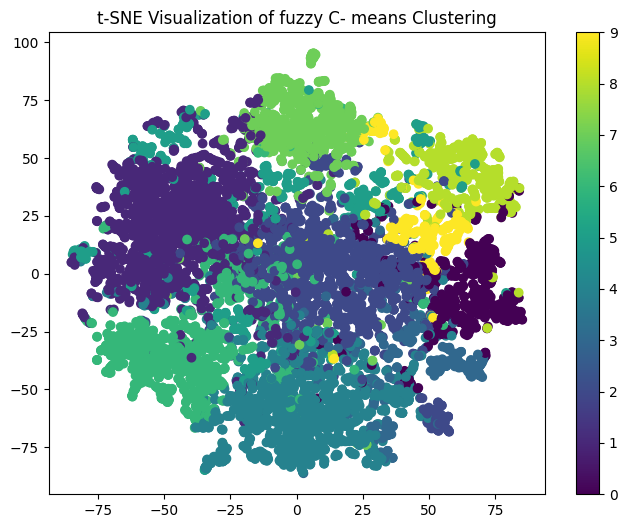

In [135]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

In [136]:
cluster_labels = Gmm(test_pdf2,5)  #getting the cluster assignments
accuracycalc(cluster_labels)#calculating the accuracy

Silhouette Score: 0.040238761487660264
Accuracy: 0.12634212446575627


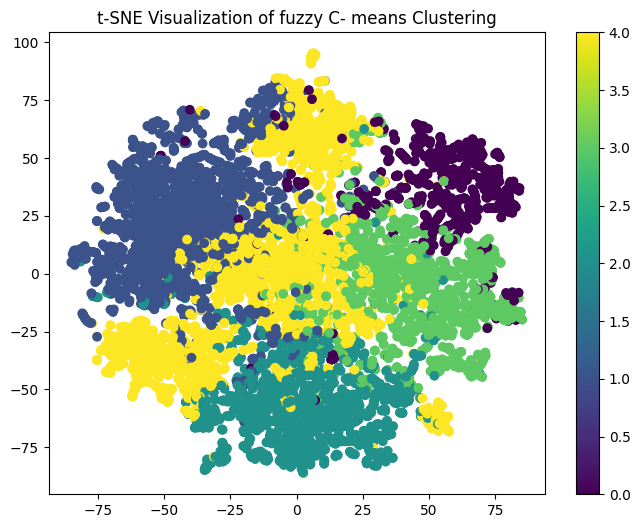

In [137]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

In [138]:
cluster_labels = Gmm(test_pdf2,2)  #getting the cluster assignments
accuracycalc(cluster_labels)#calculating the accuracy

Silhouette Score: 0.11437366681415659
Accuracy: 0.32075471698113206


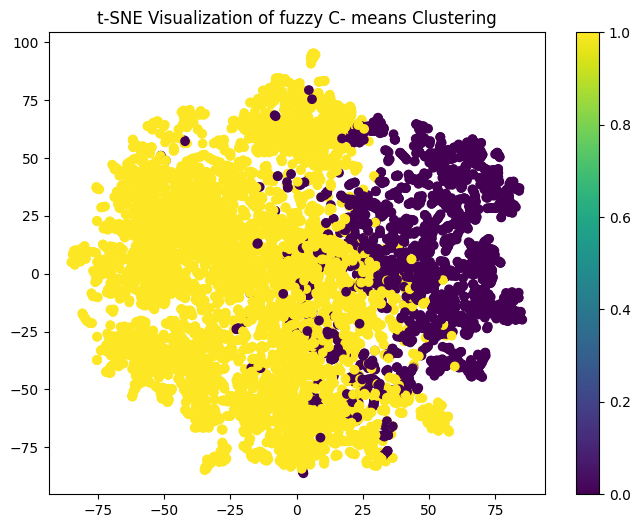

In [139]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

FCM (Fuzzy C-Means)

In [140]:
import skfuzzy as fuzz

def fuzzy(data,clus): # function to perform FCM on the data
    n_clusters = clus  # assigned the number of clusters given in the function call
    best_sil_sc = None #initializing the best silhoutte sore
    best_clus_assignment = None #initializing the assignmnets depending on the best silhoutte score

    m = 2 # setting the fuzziness coefficient
    # running FCM on the data
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=0.005, maxiter=1000, init=None)
    cluster_assignments = np.argmax(u, axis=0) #Assigning data labels to clusters based on the maximum membership value
    membership_values = u # Storing membership values
    print("the fuzzy coefficient",m) # Printing the fuzziness coefficient
    sil_score = silhouetteScore(data, cluster_assignments) #calculating the silhouette score
    best_sil_sc = sil_score # Store the silhouette score as the best so far
    best_clus_assignment = cluster_assignments # Store the cluster assignments as the best so far
    
    for i in range(3,6): #checking the rest of the coeffcients values
        m = i # setting the fuzziness coefficient
        # running FCM on the data
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=0.005, maxiter=1000, init=None)

        cluster_assignments = np.argmax(u, axis=0) #Assigning data labels to clusters based on the maximum membership value
        membership_values = u # Storing membership values
        print("the fuzzy coefficient",m) # Printing the fuzziness coefficient
        sil_score = silhouetteScore(data, cluster_assignments) #calculating the silhouette score
        if sil_score > best_sil_sc: #checking if the silhouette score is better
            best_sil_sc = sil_score #assigning if it is
            best_clus_assignment = cluster_assignments #assigning the respected cluster assignments
    
    return best_clus_assignment #returning the best labels

In [141]:
cluster_labels = fuzzy(test_pdf2,10)  #getting the cluster assignments
accuracycalc(cluster_labels)#calculating the accuracy

the fuzzy coefficient 2
Silhouette Score: -0.013160619866787824
the fuzzy coefficient 3
Silhouette Score: -0.01875954446110271
the fuzzy coefficient 4
Silhouette Score: -0.016376836557112112
the fuzzy coefficient 5
Silhouette Score: -0.04390443309365609
Accuracy: 0.2652976128426978


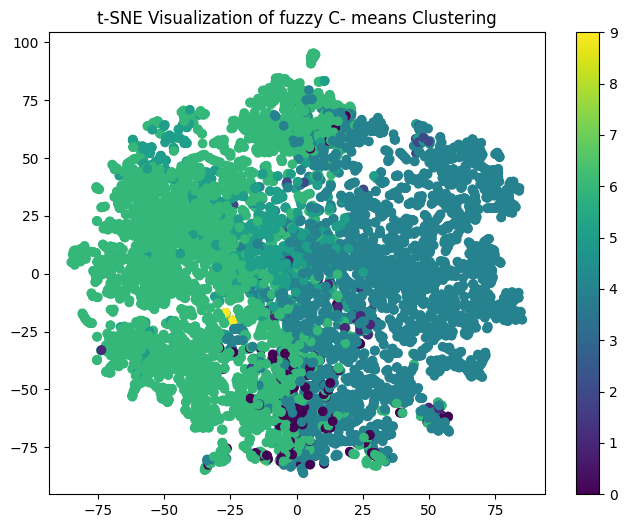

In [142]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

In [143]:
cluster_labels = fuzzy(test_pdf2,5)  #getting the cluster assignments
accuracycalc(cluster_labels) #calculating the accuracy

the fuzzy coefficient 2
Silhouette Score: 0.03654237720540135
the fuzzy coefficient 3
Silhouette Score: 0.011566598342112268
the fuzzy coefficient 4
Silhouette Score: -0.01565689457199276
the fuzzy coefficient 5
Silhouette Score: -0.01112507383142744
Accuracy: 0.24955696862295423


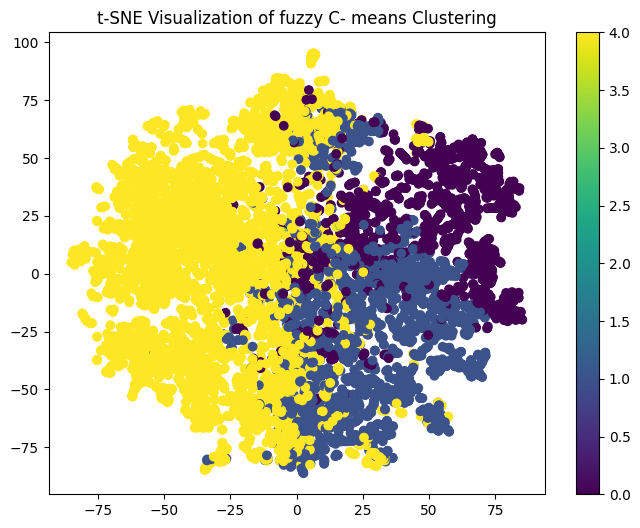

In [144]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

In [145]:
cluster_labels = fuzzy(test_pdf2,2)  #getting the cluster assignments
accuracycalc(cluster_labels) #calculating the accuracy

the fuzzy coefficient 2
Silhouette Score: 0.07316718555784112
the fuzzy coefficient 3
Silhouette Score: 0.05078783441526479
the fuzzy coefficient 4
Silhouette Score: 0.06697250739009744
the fuzzy coefficient 5
Silhouette Score: 0.0711127101095042
Accuracy: 0.29396434900448243


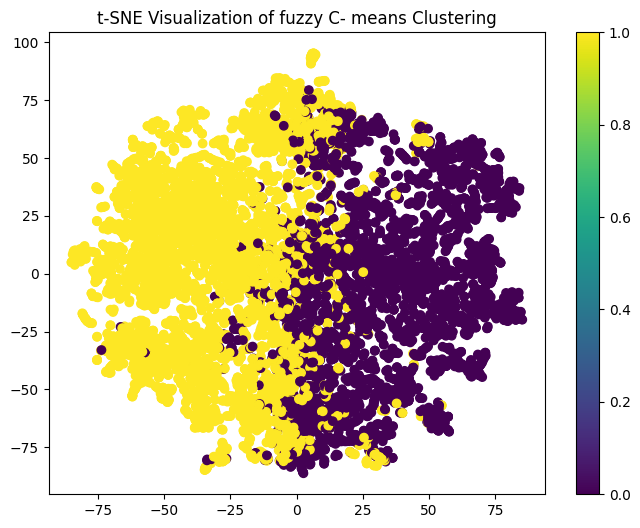

In [146]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of fuzzy C- means Clustering')
plt.colorbar()
plt.show()

GMM and FCM on PCA with 50 and 5 principal components

In [150]:
image_df_accuracy

0     1     2     3     4     5     6     7     8     9     ...  2294  \
0      113   113   114   114   115   117   119   122   125   129  ...   182   
1      106   106   106   106   106   107   107   108   108   109  ...   135   
2      103   104   106   110   114   119   124   129   134   138  ...   157   
3       78    79    82    87    92    99   105   112   119   125  ...    93   
4      120   120   120   120   120   120   120   120   120   120  ...   129   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9588   218   218   217   214   212   209   205   201   195   189  ...   117   
9589   121   122   124   128   134   140   148   155   163   170  ...   165   
9590   247   247   246   245   243   241   239   237   236   235  ...   179   
9591   213   213   213   213   213   213   214   214   214   214  ...   129   
9592   249   249   248   246   243   240   235   230   223   216  ...   140   

      2295  2296  2297  2298  2299  2300  2301  2302  2303  
0      185   187   188   189   190   191   191   191   191  
1      135   135   135   135   135   135   135   135   135  
2      161   164   166   168   169   169   170   170   170  
3       92    90    88    86    83    81    79    77    77  
4      129   128   128   128   128   128   128   128   128  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
9588   106    97    89    83    79    75    74    72    72  
9589   162   160   158   157   157   156   156   156   156  
9590   178   178   177   177   177   177   177   177   177  
9591   118   106    96    86    77    70    65    62    61  
9592   129   116   105    93    83    75    69    65    64  

[9593 rows x 2304 columns]

In [151]:
prep_50pca = PCAOnData(image_df_accuracy,50) #applying pca for 50 principal components
prep_5pca = PCAOnData(image_df_accuracy,5)#applying pca for 5 principal components

GMM and FCM on PCA 50 

In [152]:
from sklearn.manifold import TSNE

def tSNEplots(data, cluster_labels):
    tsne = TSNE(n_components=2, random_state=19)
    tsne_result = tsne.fit_transform(data) 
    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('t-SNE Visualization of fuzzy C- means Clustering')
    plt.colorbar()
    plt.show()


GMM on 10 clusters
Silhouette Score: 0.022392966235175723
Accuracy: 0.11143542166162827


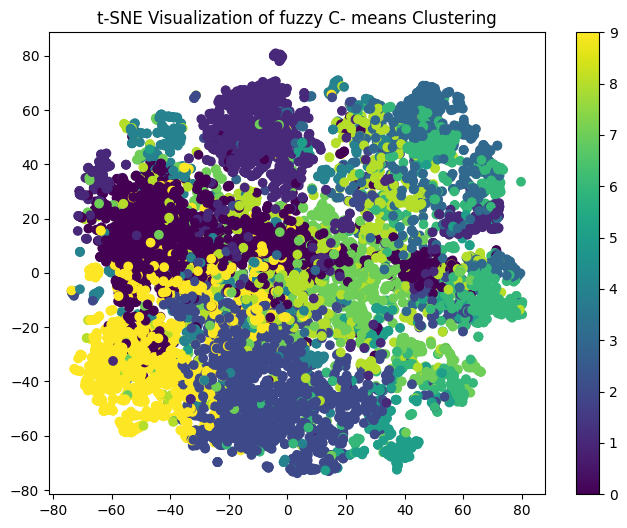

GMM on 5 clusters
Silhouette Score: 0.008603251143779175
Accuracy: 0.16595434170749504


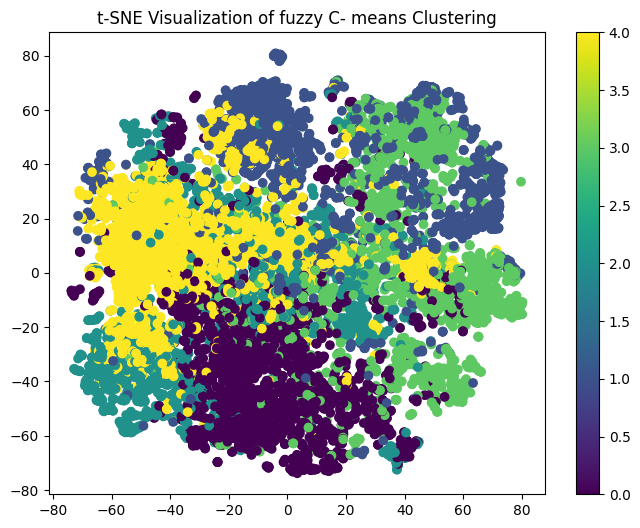

GMM on 2 clusters
Silhouette Score: 0.15208405703188643
Accuracy: 0.2255811529240071


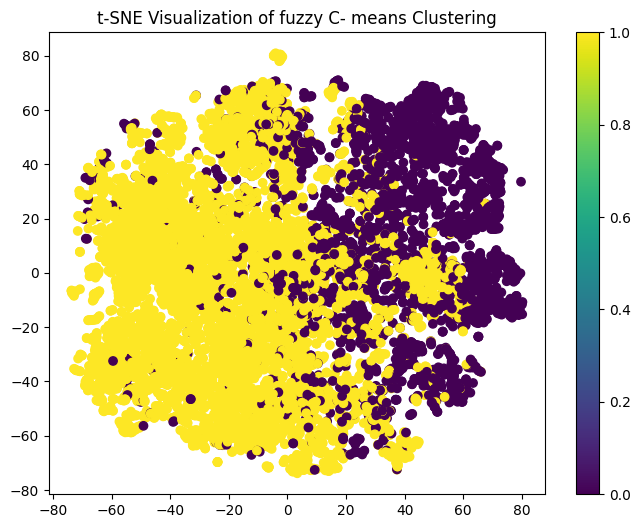

In [153]:
print("GMM on 10 clusters")
cluster_labels = Gmm(prep_50pca,10) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

print("GMM on 5 clusters")
cluster_labels = Gmm(prep_50pca,5) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

print("GMM on 2 clusters")
cluster_labels = Gmm(prep_50pca,2) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

fuzzy C-means on 10 clusters
the fuzzy coefficient 2
Silhouette Score: 0.035432208135963414
the fuzzy coefficient 3
Silhouette Score: 0.02413357207608
the fuzzy coefficient 4
Silhouette Score: 0.01673149392737985
the fuzzy coefficient 5
Silhouette Score: -0.013011382336595666
Accuracy: 0.1055978317523194


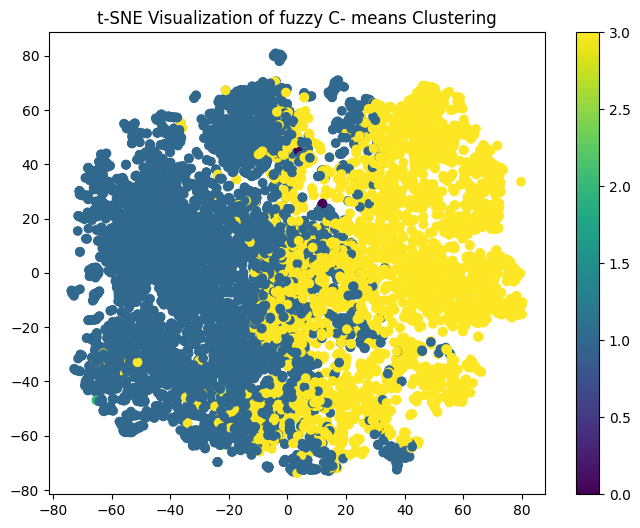



fuzzy C-means on 5 clusters
the fuzzy coefficient 2
Silhouette Score: 0.008496529513478552
the fuzzy coefficient 3
Silhouette Score: -0.02105064237267595
the fuzzy coefficient 4
Silhouette Score: -0.0010833548475552431
the fuzzy coefficient 5
Silhouette Score: 0.034675195597060234
Accuracy: 0.12019180652559158


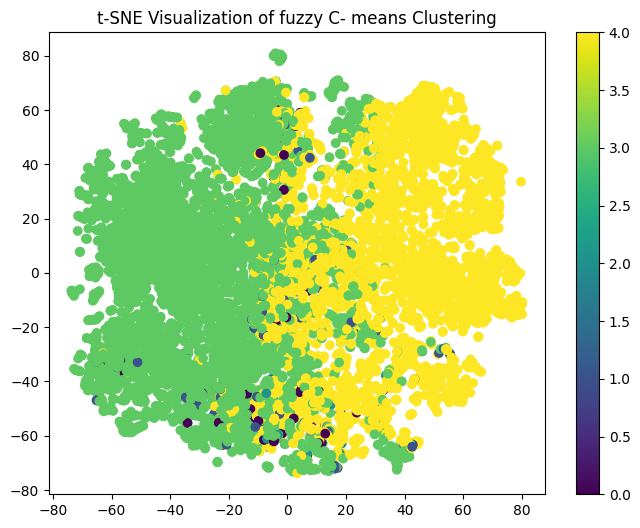



fuzzy C-means on 2 clusters
the fuzzy coefficient 2
Silhouette Score: -0.017137900476463696
the fuzzy coefficient 3
Silhouette Score: -0.008400476590844924
the fuzzy coefficient 4
Silhouette Score: -0.010131980957805615
the fuzzy coefficient 5
Silhouette Score: 0.01548410700580547
Accuracy: 0.30042739497550297


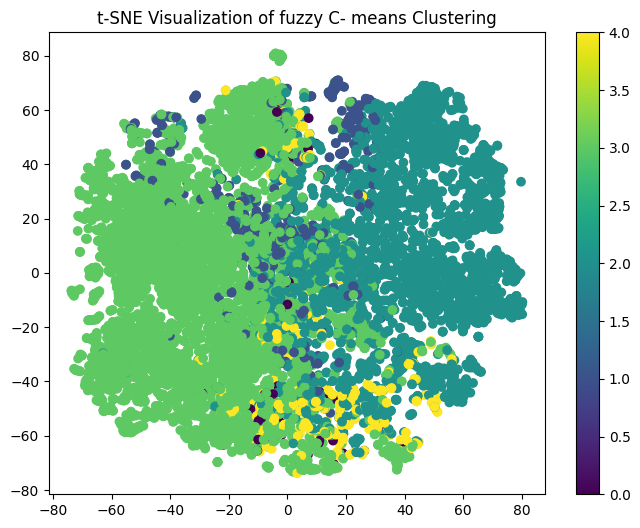

In [154]:
print("fuzzy C-means on 10 clusters")
cluster_labels = fuzzy(prep_50pca,5) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph
print("\n")

print("fuzzy C-means on 5 clusters")
cluster_labels = fuzzy(prep_50pca,5) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph
print("\n")

print("fuzzy C-means on 2 clusters")
cluster_labels = fuzzy(prep_50pca,5) #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph
print("\n")

GMM and FCM on PCA 5

GMM on 10 clusters
Silhouette Score: 0.1454541399374707
Accuracy: 0.14865005733347234


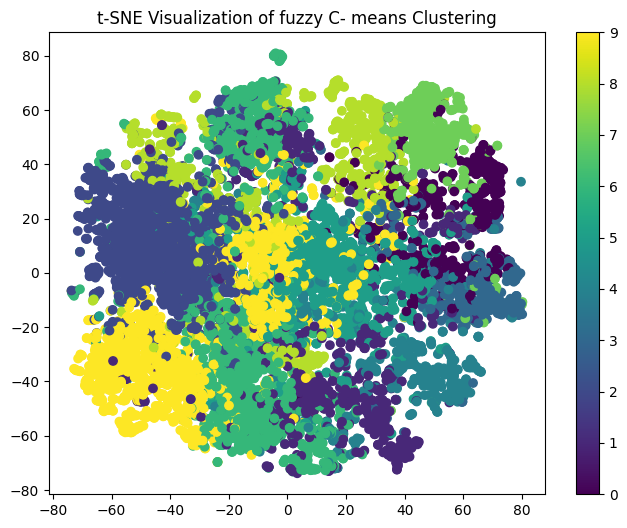

GMM on 5 clusters
Silhouette Score: 0.14781083185217594
Accuracy: 0.27530490983008443


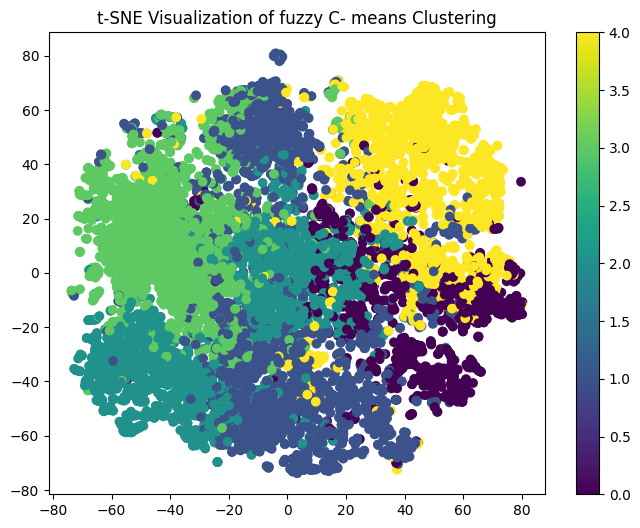

GMM on 2 clusters
Silhouette Score: 0.23485251936766907
Accuracy: 0.2617533618263317


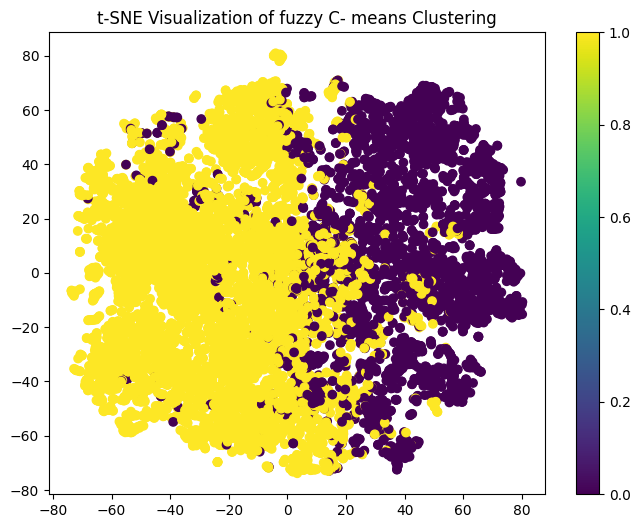

In [155]:
print("GMM on 10 clusters")
cluster_labels = Gmm(prep_5pca,10)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

print("GMM on 5 clusters")
cluster_labels = Gmm(prep_5pca,5)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

print("GMM on 2 clusters")
cluster_labels = Gmm(prep_5pca,2)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels) #plotting the graph

fuzzy C-means on 10 clusters
the fuzzy coefficient 2
Silhouette Score: 0.1091687010709576
the fuzzy coefficient 3
Silhouette Score: -0.024399676597863934
the fuzzy coefficient 4
Silhouette Score: -0.06505552166986457
the fuzzy coefficient 5
Silhouette Score: -0.09408338073325385
Accuracy: 0.20525383091837798


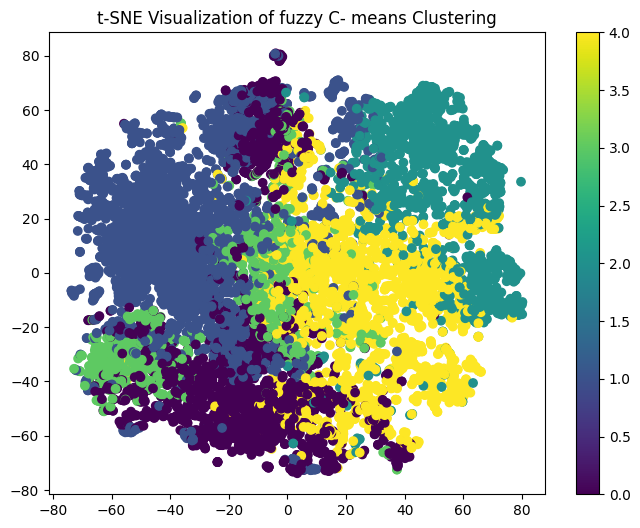



fuzzy C-means on 5 clusters
the fuzzy coefficient 2
Silhouette Score: 0.10563062625138624
the fuzzy coefficient 3
Silhouette Score: -0.04427072306583737
the fuzzy coefficient 4
Silhouette Score: -0.10861666269924793
the fuzzy coefficient 5
Silhouette Score: -0.12899259475356603
Accuracy: 0.2485145418534348


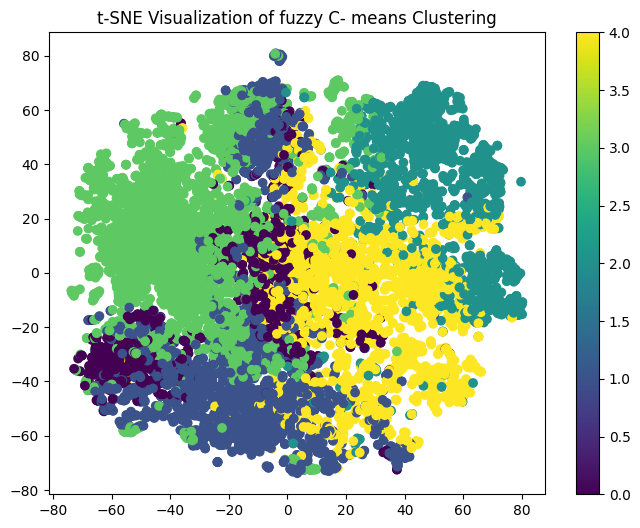



fuzzy C-means on 2 clusters
the fuzzy coefficient 2
Silhouette Score: 0.10170503342289894
the fuzzy coefficient 3
Silhouette Score: -0.05048606814227292
the fuzzy coefficient 4
Silhouette Score: -0.12833406131145428
the fuzzy coefficient 5
Silhouette Score: 0.025778498310904716
Accuracy: 0.2658188262274575


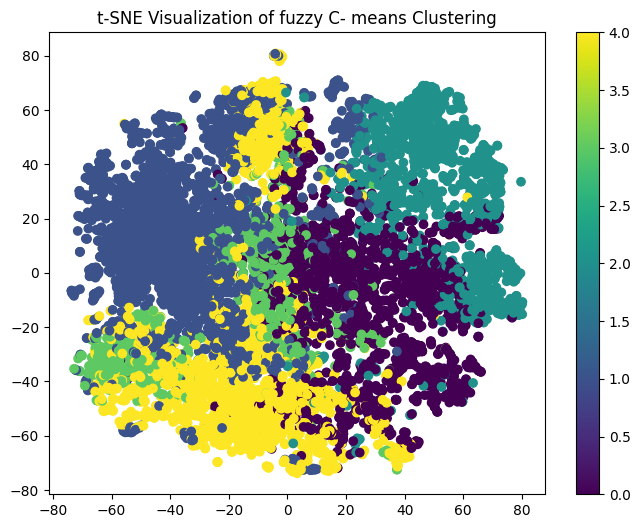

In [156]:
print("fuzzy C-means on 10 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels)  #plotting the graph
print("\n")

print("fuzzy C-means on 5 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels)  #plotting the graph
print("\n")

print("fuzzy C-means on 2 clusters")
cluster_labels = fuzzy(prep_5pca,5)  #getting the cluster assignments
accuracycalc(cluster_labels) #getting the accuracy for the above cluster assignment
tSNEplots(prep_50pca,cluster_labels)  #plotting the graph
print("\n")